In [52]:
from sklearn.tree import DecisionTreeClassifier #importa el clasificador de arbo de deciciones
from sklearn.datasets import load_breast_cancer, load_iris #importar el set de datos de cancer e iris
from sklearn.model_selection import train_test_split #funcion que devide la data en entrenamiento y texting
from sklearn.tree import export_graphviz #estos permiten graficar el arbol
import graphviz
import matplotlib.pyplot as plt
import numpy as np

In [53]:
iris=load_iris() #se carga el set de datos a la varible iris

In [54]:
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [55]:
X_entrenamiento,X_test,y_entrenamiento,y_test=train_test_split(iris.data,iris.target) #divide el set de datos en entreamiento y testing

In [56]:
arbol=DecisionTreeClassifier() # se pasa el clasificador a la variable arbol

In [57]:
arbol.fit(X_entrenamiento,y_entrenamiento) #se etrena el algoritmo

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [58]:
arbol.score(X_test,y_test) #funcion score para ver que tan bien aprendio el algoritmo

0.9210526315789473

In [59]:
arbol.score(X_entrenamiento,y_entrenamiento) # se hace la prediccion sobre los datos de entrenamiento

1.0

In [60]:
export_graphviz(arbol,out_file='arbol.dot',class_names=iris.target_names,feature_names=iris.feature_names,impurity=False,filled=True) # esta funcion genera el archivo.doc que tiene la informacion sobre nuestro arbol

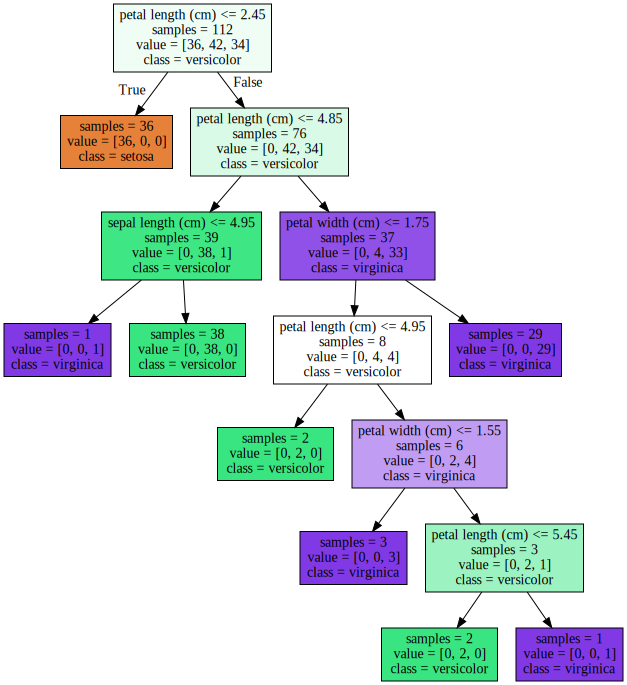

In [61]:
with open('arbol.dot') as f: #esto para graficar el arbo de desiciones
    dot_graph=f.read()
graphviz.Source(dot_graph) # genera el archivo en jupyter ojo con la alienacion

In [62]:
with open('arbol.dot') as f: #esto para graficar el arbo de desiciones
    dot_graph=f.read()
    graphviz.Source(dot_graph).render ('arbol', view=True, format='png') #.render ('arbol', view=True, format='png') genera el archive fuera

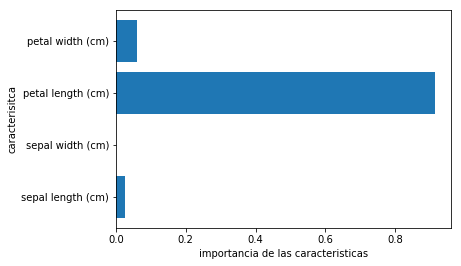

In [63]:
caract=iris.data.shape[1] #dice que caracterisitca es mas importatne para clsaisficar
plt.barh(range(caract),arbol.feature_importances_) #feature_importances la importancia de nuestras caracteristicas
plt.yticks(np.arange(caract),iris.feature_names)
plt.xlabel('importancia de las caracteristicas')
plt.ylabel('caracterisitca')
plt.show()


In [64]:
arbol=DecisionTreeClassifier(max_depth=12) # se escribe la cantidad de niveles que permitimos en el arbol

In [65]:
arbol.fit(X_entrenamiento,y_entrenamiento) # volvemos a entrenarlo

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=12,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [66]:
arbol.score(X_test,y_test)

0.9210526315789473

In [67]:
arbol.score(X_entrenamiento,y_entrenamiento)

1.0

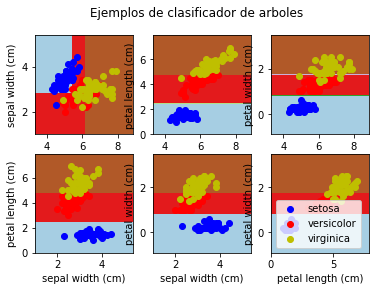

In [70]:
n_classes=3  # todo esto es para graficar como clasific los datos el algoritmo
plot_colors='bry'
plot_step=0.02

for pairidx, pair in enumerate([[0,1],[0,2],[0,3],
                               [1,2],[1,3],[2,3]]):
    X=iris.data[:,pair]
    y=iris.target
    
    #entrena algoritmo
    clf=DecisionTreeClassifier(max_depth=2).fit(X,y)
    plt.subplot(2,3,pairidx + 1) # se puede modificar la maxima profundidad para evitar el sobre ajuste
    
    x_min, x_max=X[:,0].min() - 1, X[:,0].max() +1
    y_min, y_max=X[:,1].min() - 1, X[:,1].max() +1
    xx, yy=np.meshgrid(np.arange(x_min, x_max, plot_step),
                       np.arange(y_min, y_max, plot_step))
    Z=clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z=Z.reshape(xx.shape)
    cs=plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    
    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis('tight')

    #plot puntos de entrenamiento
    for i, color in zip(range(n_classes), plot_colors):
        idx=np.where(y == i)
        plt.scatter(X[idx, 0], X[idx,1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.Paired)
    plt.axis('tight')

plt.suptitle('Ejemplos de clasificador de arboles')

plt.legend()
plt.show()

In [71]:
clf.score(X,y) #se evalua el score, si es cercano a 1 esta haciendo sobre ajuste

0.96